<a href="https://colab.research.google.com/github/pedrorotta/PythonIntermedio2022/blob/main/Lec9_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema 1

In [2]:
!pip uninstall openpyxl

Found existing installation: openpyxl 3.0.9
Uninstalling openpyxl-3.0.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-3.0.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-3.0.9


In [3]:
!pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)


In [4]:
"""
Describe un modelo de regresión lineal simple para la data de casas
"""
import pandas as pd
casasdf = pd.read_excel("/content/Lec2_Prob1.xlsx")
display(casasdf.head())

,Precio,Área(m2),Cuartos,Baños,Ubicación
0,612.0,333.0,6.0,6.0,Asentamiento Humano
1,380.0,153.0,3.0,2.0,Urbanización
2,428.0,320.0,5.0,2.0,Urbanización
3,370.5,120.0,2.0,1.0,Condominio
4,2535.0,550.0,6.0,8.0,Fundo


In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

#Separación de X & y. 
tf.random.set_seed(32)
X = np.array(casasdf['Área(m2)'])
y = np.array(casasdf['Precio'])
#------------------------------------------

#Conversión dimensional
X = np.reshape(X,(len(X),1))
y = np.reshape(y,(len(y),1))
#------------------------------------------

#Dividir
Xtrain,Xtest,ytrain,ytest = tts(X,y,random_state = 42)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
X2 = scaler1.fit_transform(X)
y2 = scaler1.fit_transform(y)

In [7]:
import matplotlib.pylab as plt
X2train,X2test,y2train,y2test = tts(X2,y2,test_size=0.40,random_state = 20)

In [8]:
#Definir el modelo: Tensorflow

#######################################
#Vamos a usar Sequential primero, para hacer el marco del modelo

modeloNN1 = tf.keras.Sequential([

   tf.keras.Input(shape=(1,)),
   tf.keras.layers.Dense(1,activation='linear'),                             
                               

])

#################### Compilar el modelo
modeloNN1.compile(loss =  tf.keras.losses.mse, optimizer = tf.keras.optimizers.SGD(),
                  metrics = ['mae'])

In [9]:

ajuste = modeloNN1.fit(X2train,y2train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 951ms/step - loss: 0.1102 - mae: 0.2623
Epoch 2/200
1/1 [==============================] - 0s 25ms/step - loss: 0.1069 - mae: 0.2563
Epoch 3/200
1/1 [==============================] - 0s 23ms/step - loss: 0.1037 - mae: 0.2505
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 0.1007 - mae: 0.2448
Epoch 5/200
1/1 [==============================] - 0s 28ms/step - loss: 0.0978 - mae: 0.2392
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0951 - mae: 0.2337
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.0924 - mae: 0.2284
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0899 - mae: 0.2237
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0875 - mae: 0.2193
Epoch 10/200
1/1 [==============================] - 0s 24ms/step - loss: 0.0851 - mae: 0.2150
Epoch 11/200
1/1 [==============================] - 0s 38ms/step - los

In [10]:
# Evaluamos para X2Test
ypredicho2 = modeloNN1.predict(X2test)
r2model1 = r2_score(y2test,ypredicho2)
print(r2model1)

0.2877949378692505


In [11]:
"""
Describe un modelo de regresión lineal múltiple para la data de casas
"""

from sklearn.preprocessing import LabelEncoder

Xlabel = np.array(casasdf['Ubicación'])

Encoder = LabelEncoder()
Encoder.fit(Xlabel)
Xlabel = Encoder.fit_transform(Xlabel)

In [12]:
Xdf = casasdf.drop(columns = ['Precio','Ubicación']) # El valor del df de los features
Xdf['Ubicación'] = Xlabel

In [13]:
X = np.array(Xdf)

In [14]:
# Necesitamos y
y = np.array(casasdf['Precio'])
y = np.reshape(y,(len(y),1))

In [15]:
## Escalar los datos
Scaler = MinMaxScaler()
Xl = Scaler.fit_transform(X)
yl = Scaler.fit_transform(y)

In [16]:
Xltrain,Xltest,yltrain,yltest = tts(Xl,yl,test_size = 0.40,random_state = 42)

In [65]:
tf.random.set_seed = 42
modelo2NN = tf.keras.Sequential([
       tf.keras.Input(shape = (4,)),
       tf.keras.layers.Dense(4,activation='relu'),
       tf.keras.layers.Dense(2,activation='relu'),
       tf.keras.layers.Dense(1),                          
])

modelo2NN.compile(loss = tf.keras.losses.mse, 
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ['mae'])

In [66]:
modelo2NN.fit(Xltrain,yltrain,epochs= 500,verbose = False)

In [67]:
ylpreditest2 = modelo2NN.predict(Xltrain)
ylpredi2 = modelo2NN.predict(Xltest)
r22 = r2_score(yltest,ylpredi2)
r22train = r2_score(yltrain,ylpreditest2)
print(r22)
print(r22train)

-0.006388246086525218
0.053573269047546224


In [84]:
modelo3NN = tf.keras.Sequential([
       tf.keras.Input(shape = (4,)),
       tf.keras.layers.Dense(8,activation='relu'),
       tf.keras.layers.Dense(4,activation='relu'),
       tf.keras.layers.Dense(2,activation='relu'),
       tf.keras.layers.Dense(1)                          
])

modelo3NN.compile(loss = tf.keras.losses.mae, 
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ['mse'])

In [85]:
modelo3NN.fit(Xltrain,yltrain,epochs = 1000, verbose = 0)

In [86]:
from sklearn.metrics import r2_score
ypredtest = modelo3NN.predict(Xltest)
ypredtrain = modelo3NN.predict(Xltrain)

r2trainModelo3 = r2_score(yltrain,ypredtrain)
r2testModelo3 = r2_score(yltest,ypredtest)

generalizacion = abs(r2trainModelo3-r2testModelo3)/max(r2trainModelo3,r2testModelo3)
print(r2trainModelo3)
print(r2testModelo3)
print(generalizacion)

0.6880670312837803
0.6342894491490946
0.07815747549239312


## Problema 2

In [88]:
"""
Describe un modelo de clasificación para breast cancer
"""

breastdf = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase6/breast-cancer.csv')


dfX = breastdf.drop(columns = ['id','diagnosis'])

In [95]:
from sklearn.preprocessing import LabelEncoder
y = np.array(breastdf['diagnosis'])
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)
y = np.reshape(y,(len(y),1))
print(y[:4])
print(np.shape(y))

[[1]
 [1]
 [1]
 [1]]
(569, 1)


In [ ]:
## Notas: Se puede realizar
#scatter plot
## con modelos PCA

In [108]:
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
X = np.array(dfX)
X = escalar.fit_transform(X)
print(X[0:4,:])

[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.55638563 0.36007463 0.50844166 0.37450845
  0.48358978 0.38537513 0.35974441 0.83505155 0.

In [98]:
Xtrain,Xtest,ytrain,ytest = tts(X,y)

In [101]:
## Crear el modelo

ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

ModeloClasificador.fit(Xtrain,ytrain,epochs = 500)

Epoch 1/500
14/14 [==============================] - 1s 5ms/step - loss: 0.6920 - accuracy: 0.6221
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.6127
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.6127
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.6127
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.6127
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.6127
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.6127
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.6127
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6127
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.6127
Epoch 11/

In [107]:
from sklearn.metrics import recall_score, confusion_matrix

ypred_train = np.round(ModeloClasificador.predict(Xtrain),0)
ypred_test = np.round(ModeloClasificador.predict(Xtest),0)
print(ypred_train[0:4])
recall_clasificadortest = recall_score(ytest,ypred_test)
recall_clasificadort = recall_score(ytrain,ypred_train)
print(recall_clasificadort)
print(recall_clasificadortest)

[[0.]
 [0.]
 [1.]
 [1.]]
0.9818181818181818
0.9787234042553191


## Problema 3

In [109]:
"""
Describe la gráfica del modelo anterior
"""
ModeloClasificador.build()
ModeloClasificador.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 30)                930       
                                                                 
 dense_130 (Dense)           (None, 60)                1860      
                                                                 
 dense_131 (Dense)           (None, 30)                1830      
                                                                 
 dense_132 (Dense)           (None, 10)                310       
                                                                 
 dense_133 (Dense)           (None, 4)                 44        
                                                                 
 dense_134 (Dense)           (None, 2)                 10        
                                                                 
 dense_135 (Dense)           (None, 1)               

## Problema 4

In [116]:
"""
Para un segundo modelo, gráfica la función de costo
"""
ModeloClasificador2 = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(400,activation = 'relu'),
      tf.keras.layers.Dense(200,activation = 'relu'),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador2.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')


historico = ModeloClasificador2.fit(Xtrain,ytrain,epochs = 700,verbose = False)

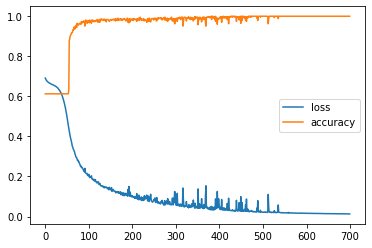

In [117]:
pd.DataFrame(historico.history).plot()

## Problema 5

In [ ]:
"""
Reduce a 1D una imagen
"""

'\nReduce a 1D una imagen\n'

In [ ]:
# Define un modelo de regresión simple para la data de casas

In [ ]:
# Define un modelo de clasificación con deep learning para la data iris

In [ ]:
# Define una imagen de un modelo para breast cancer

In [ ]:
# Define una imagen y has una disminución de sus valores a 1D